Задача 1
Скачайте данные.
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

In [4]:
import pandas as pd
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### 1.2. Изучите стоимости недвижимости

In [5]:
import numpy as np
import matplotlib.pyplot as plt

''

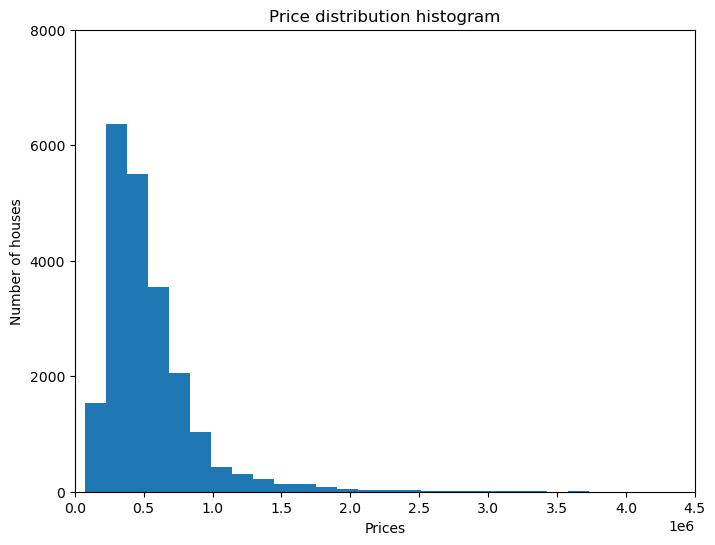

In [6]:
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins=50)
plt.title('Price distribution histogram')
plt.xlim(0, 1000000)
plt.xlabel('Prices')
plt.ylabel('Number of houses')
plt.xticks(range(0, 5000000, 500000))
plt.yticks(range(0, 10000, 2000));

##### Выводы:
- Больше всего в базе данных домов в диапазоне стоимости приблизительно от двухсот тысяч до полумиллиона;
- Соотношение стоимости и количества домов в базе имеет обратную зависимость: чем выше стоимость домов, тем меньше таких домов в базе данных. Самых дорогих домов (стоимостью       3 миллиона и выше) в десятки раз меньше, чем домов в диапазоне стоимости где-то 250-400 тысяч.

#### 1.3. Изучите распределение квадратуры жилой

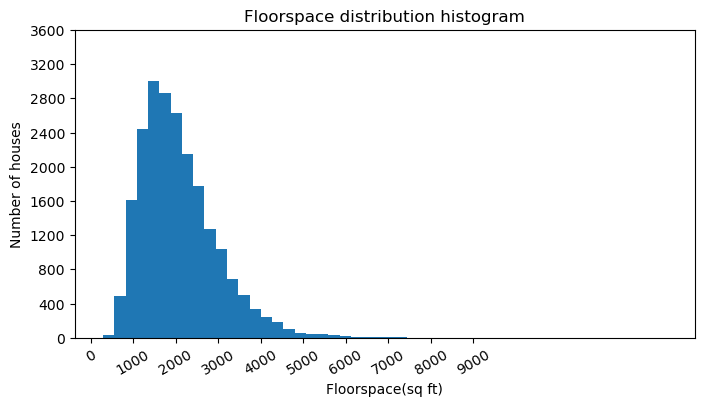

In [6]:
plt.figure(figsize=(8, 4))
plt.hist(df['sqft_living'], bins=50)
plt.title('Floorspace distribution histogram')
plt.xlabel('Floorspace(sq ft)')
plt.ylabel('Number of houses')
plt.xticks(range(0, 10000, 1000), rotation=30)
plt.yticks(range(0, 4000, 400));

##### Выводы:
- Больше всего в базе данных домов жилой площадью приблизительно от 800 до 2500 кв.футов, самая многочисленнаяя группа — дома жилой площадью от 1200 до 2200-2500 кв.футов;
- Домов с крайними значения (с самой маленькой и с самой большой жилой площадью) меньше всего по количеству.

#### 1.4. Изучите распределение года постройки

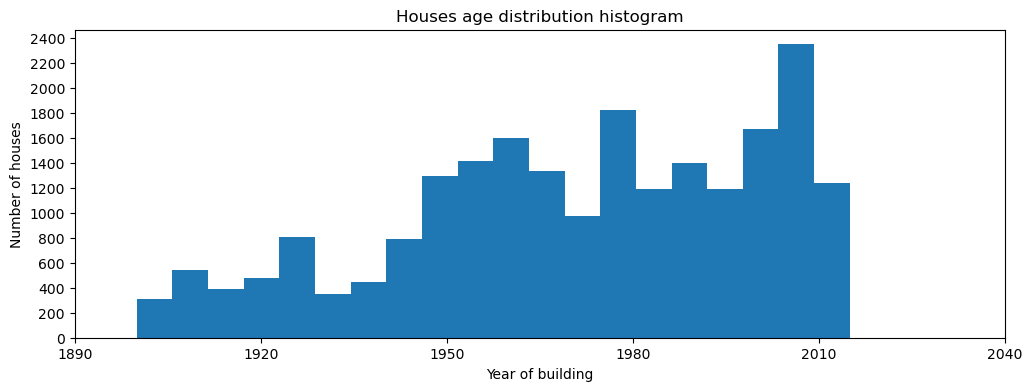

In [7]:
plt.figure(figsize=(12, 4))
plt.hist(df['yr_built'], bins=20)
plt.title('Houses age distribution histogram')
plt.xlabel('Year of building')
plt.ylabel('Number of houses')
plt.xticks(range(1890, 2050, 30))
plt.yticks(range(0, 2600, 200));

##### Выводы:
- Распределение количества домов в зависимоссти от года постройки достаточно ровное. Самые старые дома были построены около 1900 года, и таких домов в базе около трехсот.
- Наибольшее количество домов в БД были построены в период 2005-2015 гг.

Задача 2
Постройте график
Сделайте выводы
#### 2.1. Изучите распределение домов от наличия вида на набережную

In [8]:
data = df['waterfront'].value_counts()
data

0    21450
1      163
Name: waterfront, dtype: int64

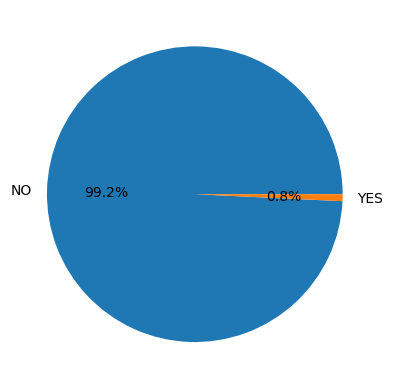

In [9]:
plt.pie(data.values, labels=['NO', 'YES'], autopct='%.1f%%');

##### Вывод:
- Доля домов вблизи побережья составляет менее одного процента от общего числа домов в БД.

#### 2.2. Изучите распределение этажей домов


In [10]:
data_f = df['floors'].value_counts().sort_index()
data_f

1.0    10680
1.5     1910
2.0     8241
2.5      161
3.0      613
3.5        8
Name: floors, dtype: int64

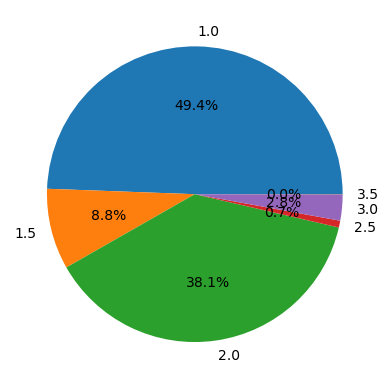

In [55]:
plt.pie(data_f.values, labels=data_f.index, autopct='%.1F%%');

- Как видим, около половины всех домов в БД - одноэтажные, еще около сорока процентов домов - двухэтажные. На долю домов с другими этажностями приходится всего около двенадцати процентов. 

#### 2.3. Изучите распределение состояния домов

In [11]:
data_c = df['condition'].value_counts().sort_index()
data_c

1       30
2      172
3    14031
4     5679
5     1701
Name: condition, dtype: int64

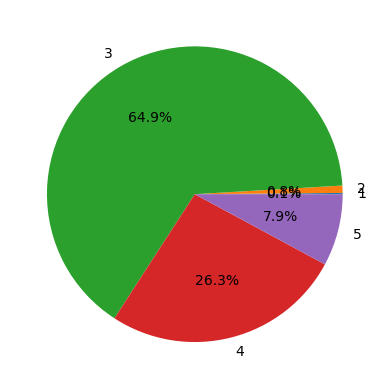

In [57]:
plt.pie(data_c.values, labels=data_c.index, autopct='%.1f%%');

- Как видим, подавляющее большинство домов находятся в удовлетворительном (оценка "3", 64,9%) и хорошем (оценка "4", 26,3%) состоянии. Около 8% домов находятся в отличном состоянии, а дома с оценкой состояния "2" и "1" совокупно составляют всего около двух процентов от общего количества домов в БД.

Задача 3
#### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [12]:
import seaborn as sns

TypeError: yticks() takes from 0 to 2 positional arguments but 10 were given

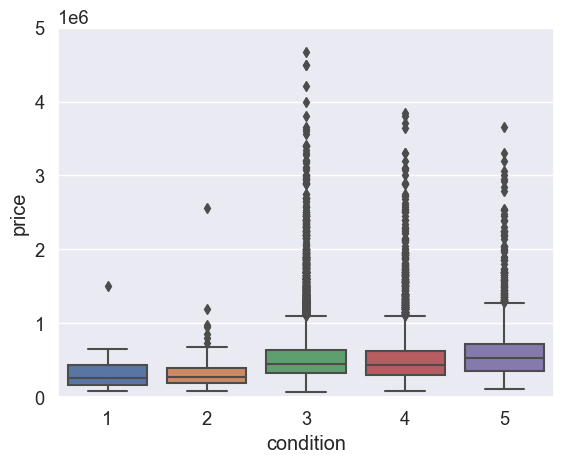

In [ ]:
sns.boxplot(x=df['condition'], y=df['price'])
plt.ylim(0, 5000000)
plt.yticks(500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000, 5000000)
plt.title('Зависимость стоимости от состояния дома');

Похоже, линейная зависимость между состоянием дома и его продажной стоимостью если и есть, то совсем небольшая.

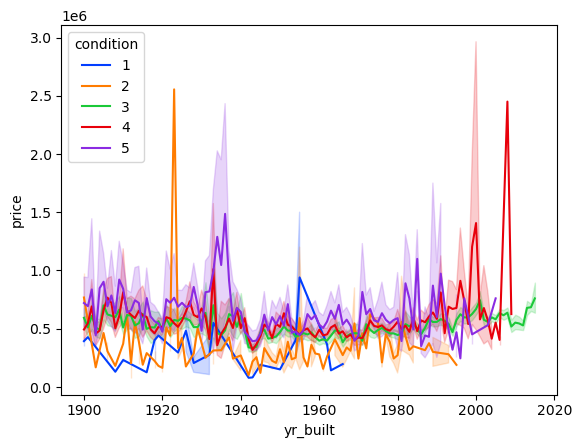

In [14]:
sns.lineplot(
    x='yr_built',
    y='price',
    data=df,
    palette='bright',
    hue='condition');

Год постройки, тоже, судя по всему, влияет на стоимость не линейно, есть дома, построенные давно, находящиеся не в лучшем состоянии, но дорогие. С другой стороны, на этом графике видно, что дома с оценкой стостояния "1" всё же стоят в основном дешевле (синяя линия в основном ниже других линий расположена), а дома с оценкой "5" - дороже. Также видно, что такое состояние дома ("1") - только у домов, построенных где-то до 70-х годов 20 века.

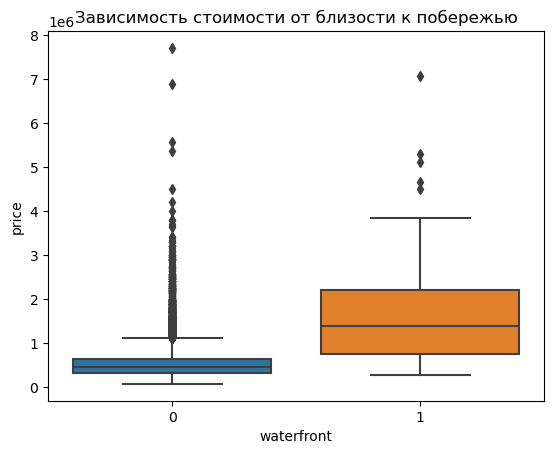

In [15]:
sns.boxplot(x=df['waterfront'], y=df['price'])  
plt.title('Зависимость стоимости от близости к побережью');

Близость к побережью, конечно, на стоимость дома сильно влияет, дома у побережья дорогие, но есть очень большие выбросы в значении "0", то есть, есть и недвижимость не у воды, но дороже, чем у воды))

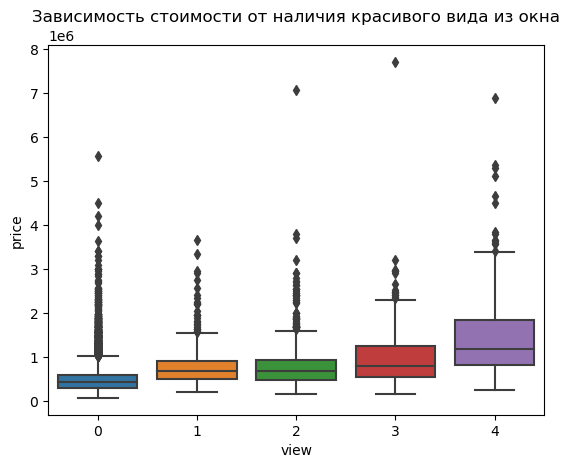

In [16]:
sns.boxplot(x=df['view'], y=df['price'])  
plt.title('Зависимость стоимости от наличия красивого вида из окна');

Зависимость небольшая, вроде бы есть (в значениях "3" и "4" медианная стоимость выше), но очень много выбросов, особенно в значении "0".

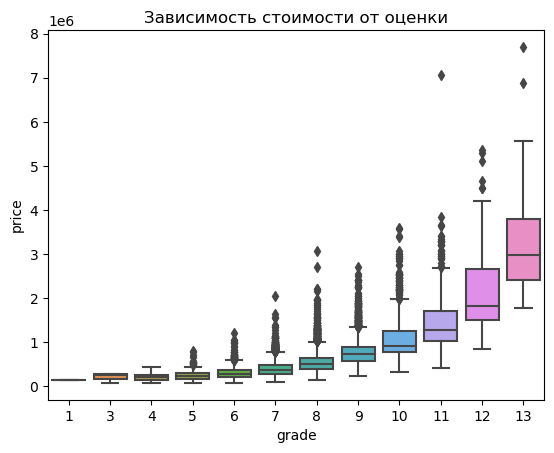

In [17]:
sns.boxplot(x=df['grade'], y=df['price'])  
plt.title('Зависимость стоимости от оценки');

Заметно, что чем выше оценка, тем выше медианная стоимость домов. Но зависимость тут, скорее всего, обратная: оценка выставляется дому по совокупности других показателей и, соответственно, чем по комплексу признаков дом более ценен, тем выше у него оценка и продажная стоимость.

In [18]:
import numpy as np

corr_houses = df.corr().round(2)
corr_houses[np.abs(corr_houses) < 0.3] = 0
corr_houses

/var/folders/7x/y_lxhgxs6dd_xxff1584f3z00000gn/T/ipykernel_43292/2474831546.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_houses = df.corr().round(2)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
price,0.0,1.00,0.31,0.53,0.70,0.00,0.00,0.0,0.4,0.00,0.67,0.61,0.32,0.00,0.0,0.00,0.31,0.00,0.59,0.00
bedrooms,0.0,0.31,1.00,0.52,0.58,0.00,0.00,0.0,0.0,0.00,0.36,0.48,0.30,0.00,0.0,0.00,0.00,0.00,0.39,0.00
bathrooms,0.0,0.53,0.52,1.00,0.75,0.00,0.50,0.0,0.0,0.00,0.66,0.69,0.00,0.51,0.0,0.00,0.00,0.00,0.57,0.00
sqft_living,0.0,0.70,0.58,0.75,1.00,0.00,0.35,0.0,0.0,0.00,0.76,0.88,0.44,0.32,0.0,0.00,0.00,0.00,0.76,0.00
sqft_lot,0.0,0.00,0.00,0.00,0.00,1.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.72
floors,0.0,0.00,0.00,0.50,0.35,0.00,1.00,0.0,0.0,0.00,0.46,0.52,0.00,0.49,0.0,0.00,0.00,0.00,0.00,0.00
waterfront,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.4,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
view,0.0,0.40,0.00,0.00,0.00,0.00,0.00,0.4,1.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
condition,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,1.00,0.00,0.00,0.00,-0.36,0.0,0.00,0.00,0.00,0.00,0.00


<Axes: >

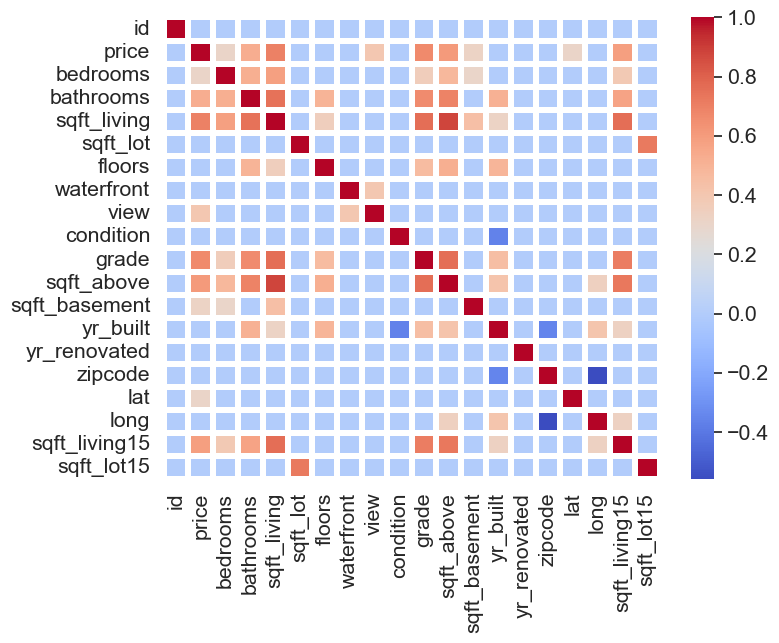

In [19]:
plt.figure(figsize=(8, 6))
sns.set(font_scale = 1.4)
sns.heatmap(corr_houses, linewidth=3,cmap='coolwarm')

In [23]:
df_sqft = df.drop(columns=['date','bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', ])
df_sqft.head()

,id,date,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,1180,5650,1180,0,1340,5650
1,6414100192,20141209T000000,538000.0,2570,7242,2170,400,1690,7639
2,5631500400,20150225T000000,180000.0,770,10000,770,0,2720,8062
3,2487200875,20141209T000000,604000.0,1960,5000,1050,910,1360,5000
4,1954400510,20150218T000000,510000.0,1680,8080,1680,0,1800,7503


In [26]:
corr_sqft = df_sqft.corr().round(2)
corr_sqft

/var/folders/7x/y_lxhgxs6dd_xxff1584f3z00000gn/T/ipykernel_43292/4078102085.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_sqft = df_sqft.corr().round(2)


,id,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
id,1.00,-0.02,-0.01,-0.13,-0.01,-0.01,-0.00,-0.14
price,-0.02,1.00,0.70,0.09,0.61,0.32,0.59,0.08
sqft_living,-0.01,0.70,1.00,0.17,0.88,0.44,0.76,0.18
sqft_lot,-0.13,0.09,0.17,1.00,0.18,0.02,0.14,0.72
sqft_above,-0.01,0.61,0.88,0.18,1.00,-0.05,0.73,0.19
sqft_basement,-0.01,0.32,0.44,0.02,-0.05,1.00,0.20,0.02
sqft_living15,-0.00,0.59,0.76,0.14,0.73,0.20,1.00,0.18
sqft_lot15,-0.14,0.08,0.18,0.72,0.19,0.02,0.18,1.00


<Axes: >

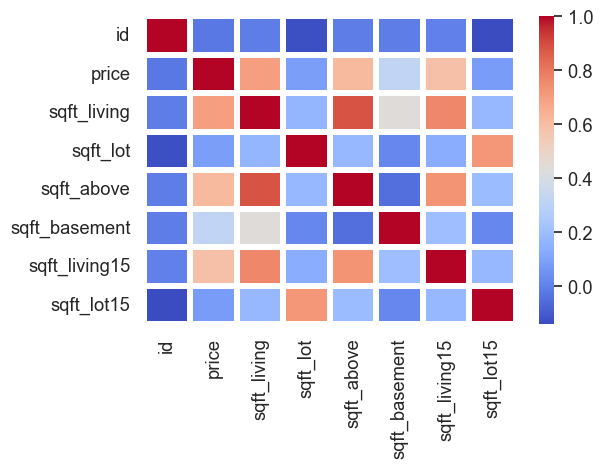

In [28]:
plt.figure(figsize=(6, 4))
sns.set(font_scale = 1.2)
sns.heatmap(corr_sqft, linewidth=3,cmap='coolwarm')

Оставила только квадратные футы, из теловой карты видно, что есть зависимость цены дома от размеров жилой площади, чем больше жилых квадратных футов, тем выше стоимость дома.